### Theory

#### 1. Stock Price Evolution (Geometric Brownian Motion - GBM)

\begin{equation*}
S_{t+\Delta t}=S_t \cdot \exp \left(\left(r-\frac{1}{2} \sigma^2\right) \Delta t+\sigma \sqrt{\Delta t} \cdot Z\right)
\end{equation*}


Used for: Simulating the stock price step-by-step in a path.
Where:
- $S_t=$ stock price at time $t$
- $r=$ risk-free interest rate
- $\sigma=$ volatility of the stock
- $\Delta t=$ time step (e.g., $1 / 250$ for daily steps over a year)
- $Z \sim \mathcal{N}(0,1)$ = standard normal random variable

#### 2. European Call Option Payoff at Maturity

\begin{equation*}
\text { Call Payoff }=\max \left(S_T-K, 0\right)
\end{equation*}


Used for: Calculating how much the holder of a call option earns at maturity.
Where:
- $S_T=$ stock price at maturity
- $K=$ strike price

#### 3. European Put Option Payoff at Maturity

\begin{equation*}
\text { Put Payoff }=\max \left(K-S_T, 0\right)
\end{equation*}


Used for: Calculating how much the holder of a put option earns at maturity.

#### 4. Present Value (Discounted Payoff)

\begin{equation*}
\text { Option Price }=e^{-r \cdot \tau} \text {. Average Payoff }
\end{equation*}


Used for: Converting the future payoff to present value.
Where:
- $\boldsymbol{r}=$ risk-free rate
- $\tau=$ time remaining to maturity from current time step (i.e., $T-t$ )
- Average Payoff = mean of simulated payoffs at that step

#### 5. Time Step Size

\begin{equation*}
\Delta t=\frac{T}{N}
\end{equation*}


Used for: Defining how big each time step is.
Where:
- $T=$ total time to maturity
- $N=$ number of time steps (e.g., 250 for daily steps in 1 year)

### Code - 1

Sample simulated stock prices at maturity:
[ 95.49432443  88.51099824  84.57755551 102.45440255  75.48595784
 132.33759028  77.38327689 109.87592046  74.56595856 117.39240128]

Sample call option payoffs:
[ 0.          0.          0.          2.45440255  0.         32.33759028
  0.          9.87592046  0.         17.39240128]

Sample put option payoffs:
[ 4.50567557 11.48900176 15.42244449  0.         24.51404216  0.
 22.61672311  0.         25.43404144  0.        ]

Estimated European Call Option Price: 9.36
Estimated European Put Option Price: 6.46


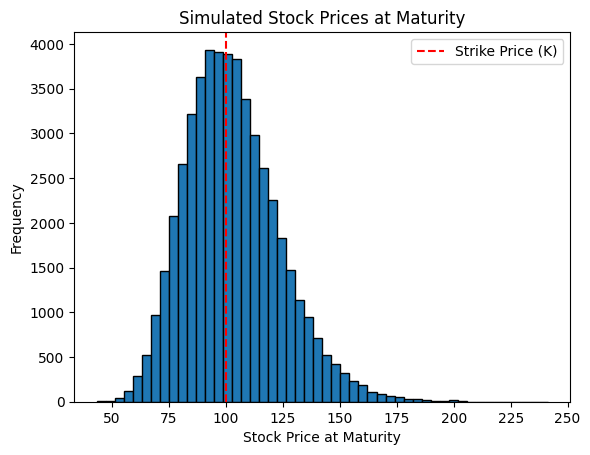

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.03      # Risk-free rate
sigma = 0.2   # Volatility
n_sim = 50000 # Number of simulations

# Step 2: Simulate stock prices at maturity
Z = np.random.randn(n_sim)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

print("Sample simulated stock prices at maturity:")
print(ST[:10])

# Step 3: Calculate call and put payoffs
call_payoffs = np.maximum(ST - K, 0)
put_payoffs = np.maximum(K - ST, 0)

print("\nSample call option payoffs:")
print(call_payoffs[:10])
print("\nSample put option payoffs:")
print(put_payoffs[:10])

# Step 4: Discount the expected payoff
call_price = np.exp(-r * T) * np.mean(call_payoffs)
put_price = np.exp(-r * T) * np.mean(put_payoffs)

print(f"\nEstimated European Call Option Price: {call_price:.2f}")
print(f"Estimated European Put Option Price: {put_price:.2f}")

# Step 5: Plot histogram of simulated stock prices
plt.hist(ST, bins=50, edgecolor='k')
plt.axvline(K, color='red', linestyle='--', label='Strike Price (K)')
plt.title("Simulated Stock Prices at Maturity")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


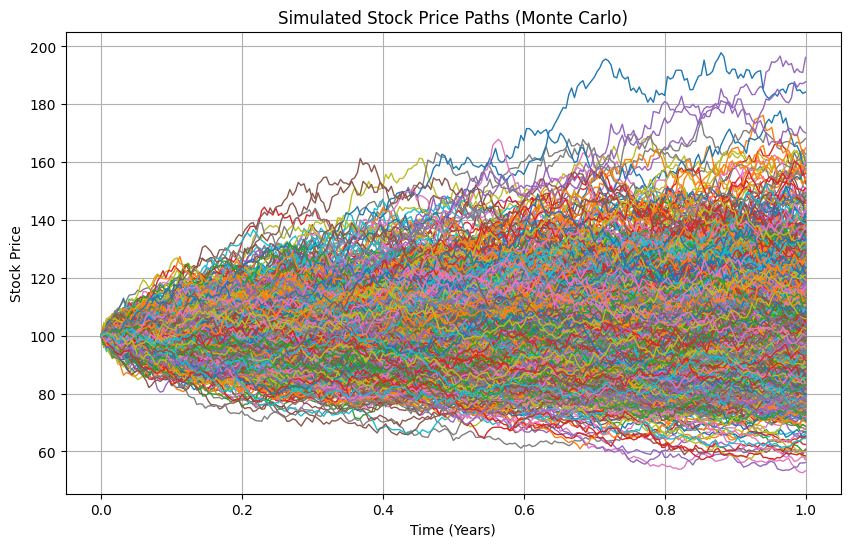

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Parameters
S0 = 100      # Initial stock price
T = 1.0       # Time to maturity (1 year)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
N = 250       # Number of time steps (daily steps)
M = 1000        # Number of paths to simulate

dt = T / N    # Time step size

# Step 2: Initialize the stock price paths matrix
S = np.zeros((M, N + 1))
S[:, 0] = S0  # Set initial price at time 0

# Step 3: Simulate paths using vectorized loop
for t in range(1, N + 1):
    Z = np.random.randn(M)  # Random normal variables for this step
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Step 4: Plot the simulated paths
time = np.linspace(0, T, N + 1)
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(time, S[i], lw=1)
plt.title("Simulated Stock Price Paths (Monte Carlo)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


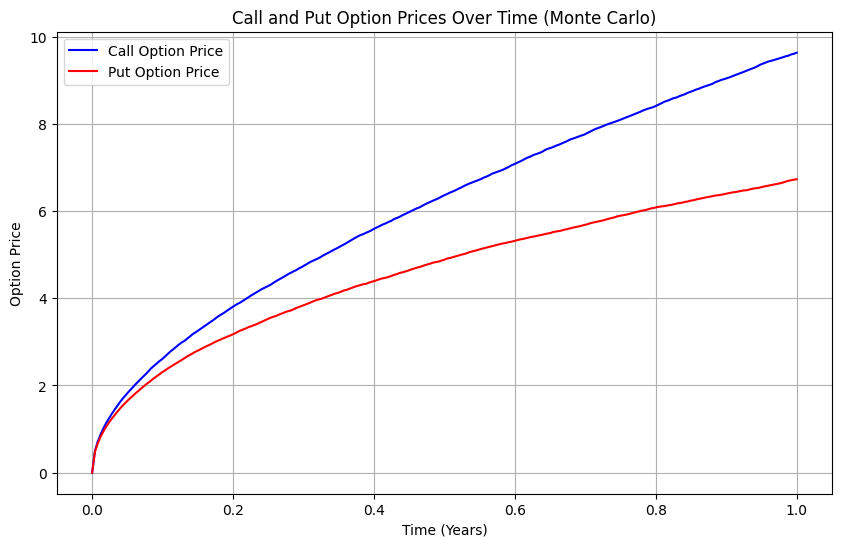

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.03      # Risk-free rate
sigma = 0.2   # Volatility
N = 252       # Number of time steps (e.g. daily)
n_sim = 50000  # Number of simulations (paths)

dt = T / N    # Time step size
time_grid = np.linspace(0, T, N + 1)

# Step 2: Initialize matrix for stock paths
S = np.zeros((n_sim, N + 1))
S[:, 0] = S0

# Step 3: Simulate the stock paths
for t in range(1, N + 1):
    Z = np.random.randn(n_sim)
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Step 4: Initialize arrays to hold option prices over time
call_prices_t = np.zeros(N + 1)
put_prices_t = np.zeros(N + 1)

# Step 5: Compute option prices at each time step
for t in range(N + 1):
    # Time to maturity from this point
    tau = T - time_grid[t]
    
    # Call and put payoff if expired now
    call_payoffs = np.maximum(S[:, t] - K, 0)
    put_payoffs = np.maximum(K - S[:, t], 0)
    
    # Discount to present value using time remaining
    call_prices_t[t] = np.exp(-r * tau) * np.mean(call_payoffs)
    put_prices_t[t] = np.exp(-r * tau) * np.mean(put_payoffs)

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_grid, call_prices_t, label="Call Option Price", color='blue')
plt.plot(time_grid, put_prices_t, label="Put Option Price", color='red')
plt.title("Call and Put Option Prices Over Time (Monte Carlo)")
plt.xlabel("Time (Years)")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.show()


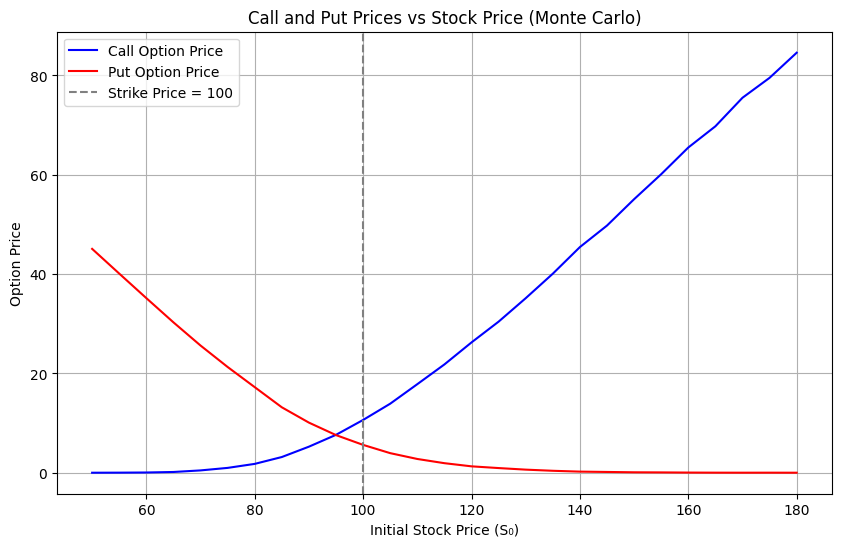

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100           # Strike price
T = 1.0           # Time to maturity (1 year)
r = 0.05          # Risk-free rate
sigma = 0.2       # Volatility
n_sim = 10000     # Number of simulations

# Range of stock prices from 50 to 180
S_range = np.arange(50, 181, 5)
call_prices = []
put_prices = []

# Monte Carlo pricing for each initial stock price
for S0 in S_range:
    # Simulate end stock price using vectorized formula (1 step)
    Z = np.random.randn(n_sim)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Call and put payoffs
    call_payoff = np.maximum(ST - K, 0)
    put_payoff = np.maximum(K - ST, 0)

    # Discounted expected payoffs
    call_price = np.exp(-r * T) * np.mean(call_payoff)
    put_price = np.exp(-r * T) * np.mean(put_payoff)

    call_prices.append(call_price)
    put_prices.append(put_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices, label="Call Option Price", color='blue')
plt.plot(S_range, put_prices, label="Put Option Price", color='red')
plt.axvline(K, linestyle='--', color='gray', label='Strike Price = 100')
plt.title("Call and Put Prices vs Stock Price (Monte Carlo)")
plt.xlabel("Initial Stock Price (S₀)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np

S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.03      # Risk-free rate
sigma = 0.2   # Volatility
N = 252       # Number of time steps (e.g. daily)
n_sim = 100000  # Number of simulations (paths)

def monte_carlo_option_pricing(S0, K, T, r, sigma, n_sim=10000):
    # Step 1: Generate random standard normal variables
    Z = np.random.randn(n_sim)

    # Step 2: Simulate stock prices at maturity using GBM
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Step 3: Calculate call and put payoffs
    call_payoff = np.maximum(ST - K, 0)
    put_payoff = np.maximum(K - ST, 0)

    # Step 4: Discount expected payoff to present value
    call_price = np.exp(-r * T) * np.mean(call_payoff)
    put_price = np.exp(-r * T) * np.mean(put_payoff)

    return call_price, put_price, ST

# Call the function
call, put, ST = monte_carlo_option_pricing(S0, K, T, r, sigma)

# Print the results
print(f"Call Option Price: {call:.4f}")
print(f"Put Option Price:  {put:.4f}")

Call Option Price: 9.3935
Put Option Price:  6.4601


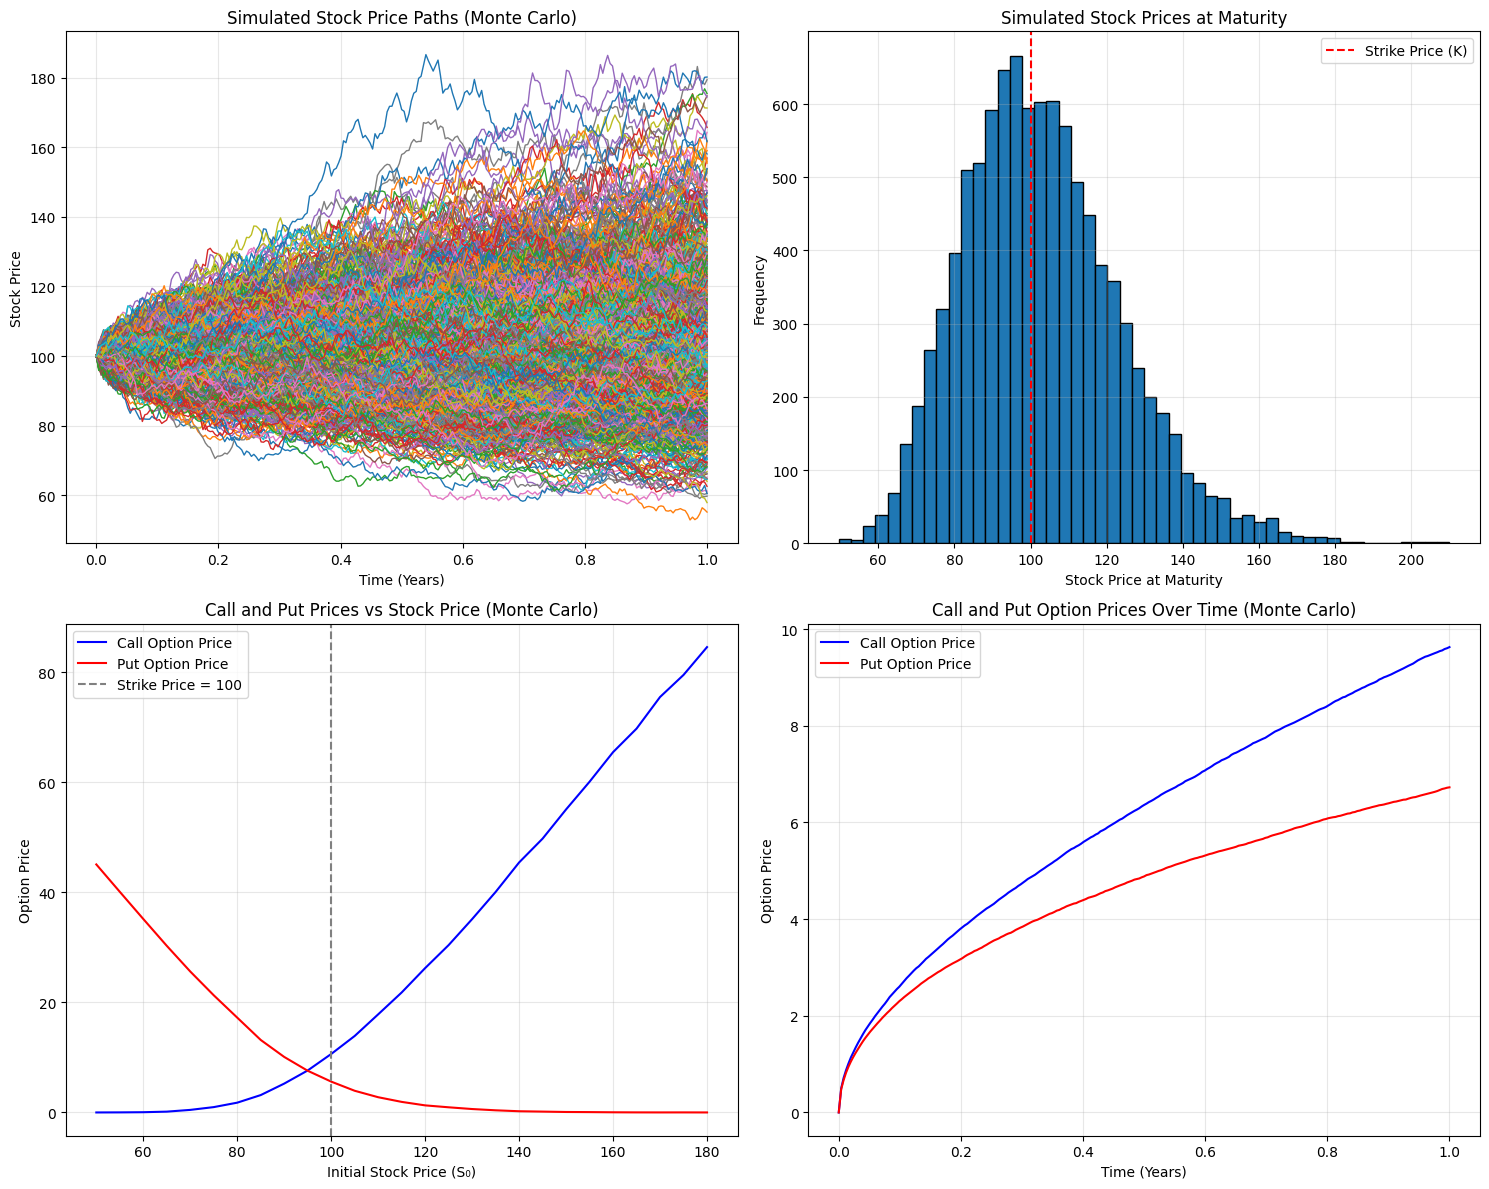

In [22]:
# Plot 1: Option price vs Stock price
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))


time = np.linspace(0, T, N + 1)
for i in range(M):
    ax1.plot(time, S[i], lw=1)
ax1.set_xlabel("Time (Years)")
ax1.set_ylabel("Stock Price")
ax1.set_title("Simulated Stock Price Paths (Monte Carlo)")
ax1.grid(True)
ax1.grid(True, alpha=0.3)

# Plot 2:  Plot histogram of simulated stock prices
ax2.hist(ST, bins=50, edgecolor='k')
ax2.axvline(K, color='red', linestyle='--', label='Strike Price (K)')
ax2.set_title('Simulated Stock Prices at Maturity')
ax2.set_xlabel("Stock Price at Maturity")
ax2.set_ylabel("Frequency")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Option price vs stock
ax3.plot(S_range, call_prices, label="Call Option Price", color='blue')
ax3.plot(S_range, put_prices, label="Put Option Price", color='red')
ax3.axvline(K, linestyle='--', color='gray', label='Strike Price = 100')
ax3.set_title("Call and Put Prices vs Stock Price (Monte Carlo)")
ax3.set_xlabel("Initial Stock Price (S₀)")
ax3.set_ylabel("Option Price")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Option prices with time
ax4.plot(time_grid, call_prices_t, label="Call Option Price", color='blue')
ax4.plot(time_grid, put_prices_t, label="Put Option Price", color='red')
ax4.set_title("Call and Put Option Prices Over Time (Monte Carlo)")
ax4.set_xlabel("Time (Years)")
ax4.set_ylabel("Option Price")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("p131.png",dpi=300)
plt.show()